Cho tập dữ liệu thời tiết thu thập bởi NCDC (đã tìm hiểu trong quá trình học)
- Tìm nhiệt độ cao nhất ghi nhận được theo từng năm.
- Tìm nhiệt độ thấp nhất ghi nhận được theo từng năm.
- Tính nhiệt độ trung bình theo từng năm.
- Vẽ biểu đồ biểu diễn nhiệt độ cao nhất, thấp nhất, trung bình theo từng năm.

In [1]:
import os, shutil
from pyspark import SparkContext

# create Spark context with necessary configuration
sc = SparkContext("local", "Text processing with PySpark Example")

# read data from text file into lines  


23/06/08 09:20:43 WARN Utils: Your hostname, hdoop-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/06/08 09:20:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/08 09:20:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/06/08 09:20:58 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
import re
lines = sc.textFile("/home/hdoop/labs/datasets/ncdc/Preprocessed")

lines = lines.map(lambda val: (val[15:19], val[87:92], val[92:93]))
lines = lines.filter(lambda line: line[1] != "+9999" and re.match("[01459]", line[2])).collect() 

In [3]:
from collections import defaultdict

data = defaultdict(list)

for items in lines:
    key = items[0]
    value = int(items[1])
    data[key].append(value)

for key in sorted(data.keys()):
    values = data[key]
    max_val = max(values)
    min_val = min(values)
    avg_val = sum(values) / len(values)
    print(f"{key}\t{max_val}\t{min_val}\t{avg_val}")

1901	317	-333	46.698507007922
1902	244	-328	21.659558263518658
1903	289	-306	48.241744739671326
1904	256	-294	33.32224247948952
1905	283	-328	43.3322664228014
1906	294	-250	47.0834855681403
1907	283	-350	31.76414576084966
1908	289	-378	28.836573511543136
1909	278	-378	26.565303955402175
1910	294	-372	35.558665794637015
1911	306	-378	30.719045120671563
1912	322	-411	16.801145236855803
1913	300	-372	29.958786491127647
1914	333	-378	29.817932296431838
1915	294	-411	5.098548073625243
1916	278	-289	21.42393787117405
1917	317	-478	22.91685727355901
1918	322	-450	31.36519845111326
1919	378	-428	27.605149653640048
1920	294	-344	43.508667830133795
1921	283	-417	34.13481600366846
1922	278	-400	27.045145686974546
1923	294	-394	26.79247747159462
1924	294	-456	38.289366187903546
1925	317	-378	37.90581319399086
1926	489	-422	38.20033193400371
1927	489	-400	75.80439727065959
1928	378	-239	75.82935442859161
1929	328	-400	94.68796944212622
1930	400	-311	109.43556905819116


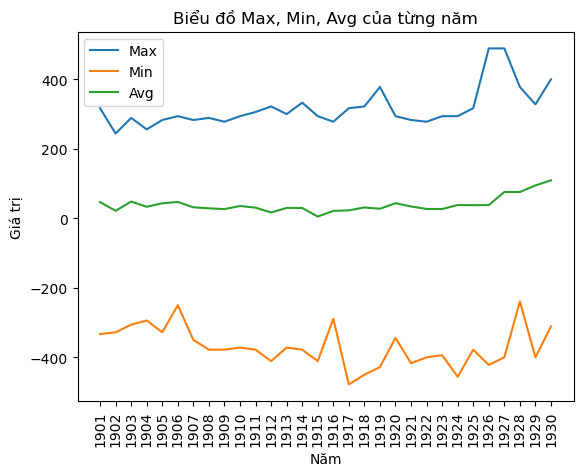

In [5]:
import matplotlib.pyplot as plt

# Tạo danh sách các key và các giá trị tương ứng
keys = sorted(data.keys())
max_vals = [max(data[key]) for key in keys]
min_vals = [min(data[key]) for key in keys]
avg_vals = [sum(data[key]) / len(data[key]) for key in keys]

# Vẽ biểu đồ cột cho max, min, avg của từng key
plt.plot(keys, max_vals, label='Max')
plt.plot(keys, min_vals, label='Min')
plt.plot(keys, avg_vals, label='Avg')
plt.xticks(rotation=90)
plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Max, Min, Avg của từng năm')
plt.legend()
plt.show()